In [33]:
import missingno as msno
import matplotlib.pyplot as pl
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import plotly
import plotly.express as px
import plotly.graph_objs as go

In [7]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [8]:
train.shape, test.shape

((7613, 5), (3263, 4))

In [9]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [10]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [11]:
train.columns

Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')

In [13]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


In [15]:
train.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [16]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [17]:
test.isnull().sum()

id             0
keyword       26
location    1105
text           0
dtype: int64

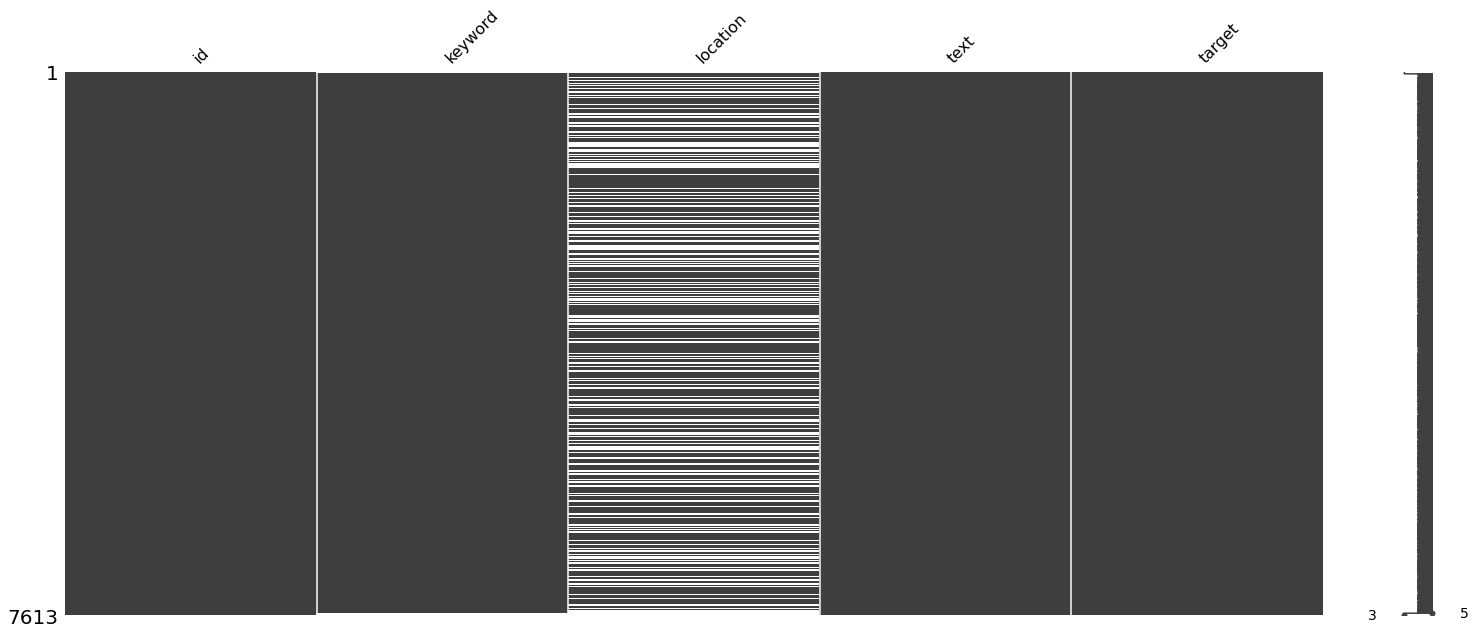

In [19]:
msno.matrix(train)

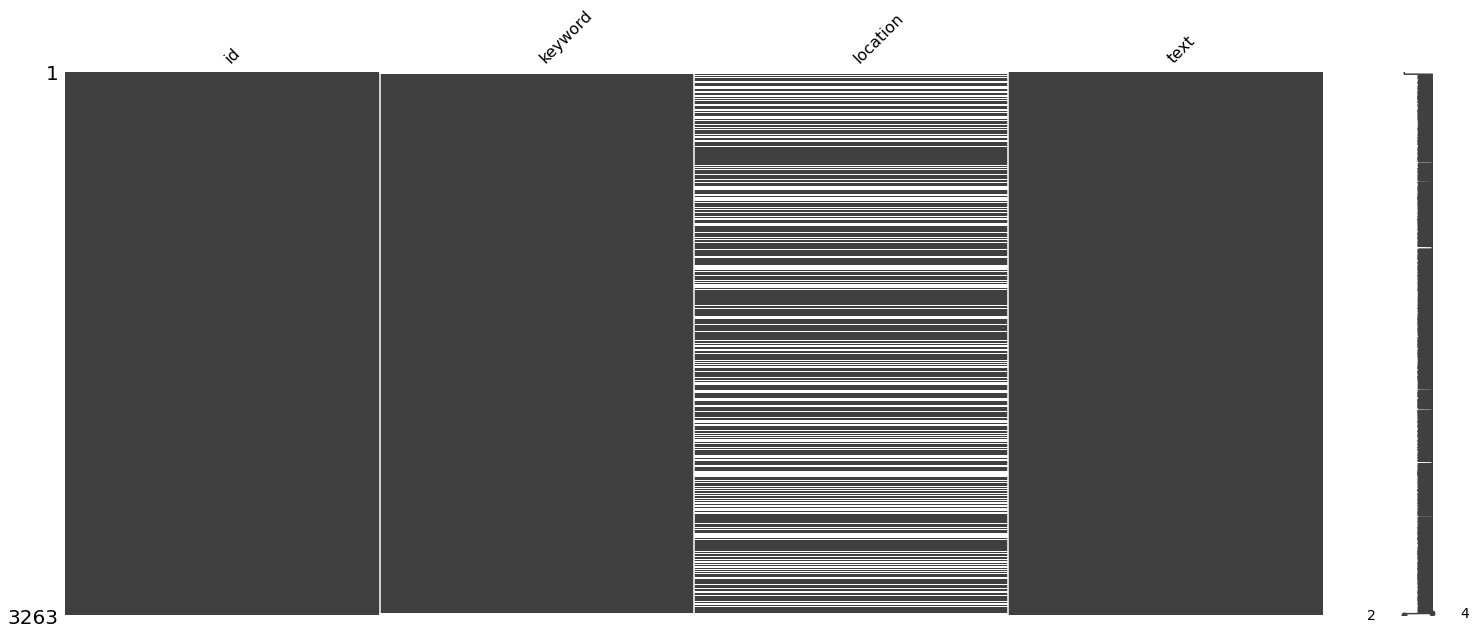

In [20]:
msno.matrix(test)

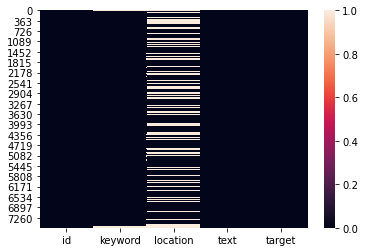

In [21]:
sns.heatmap(train.isnull())

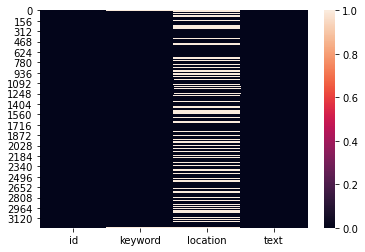

In [22]:
sns.heatmap(test.isnull())

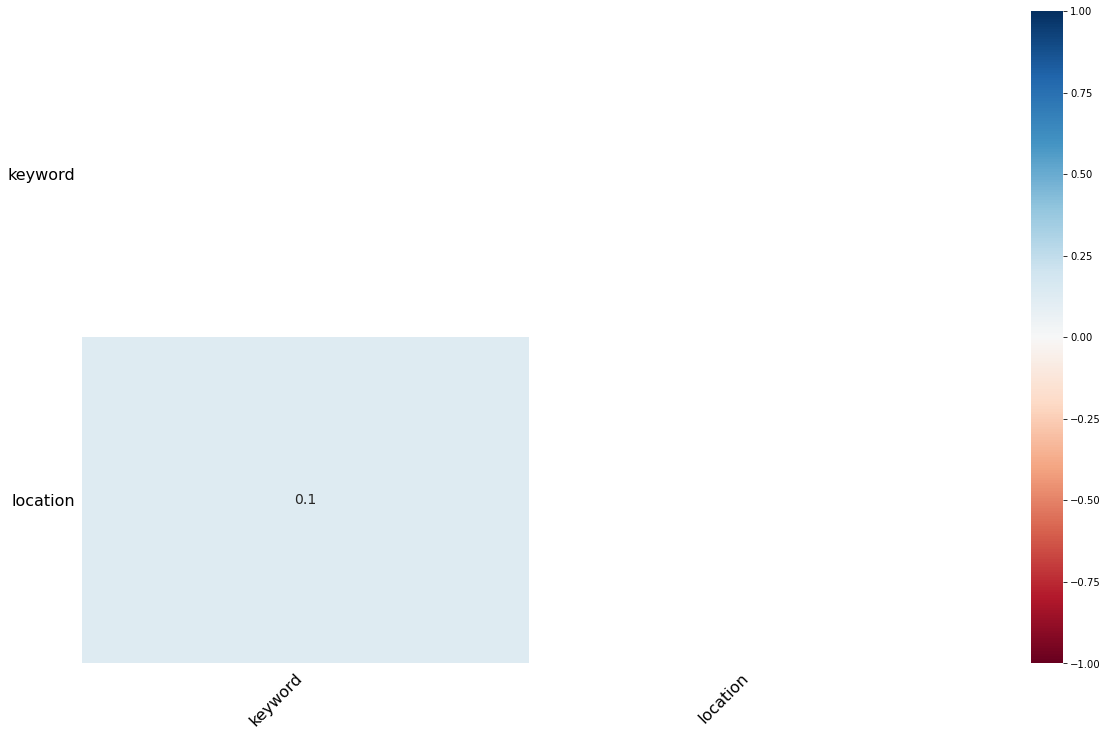

In [23]:
msno.heatmap(train)

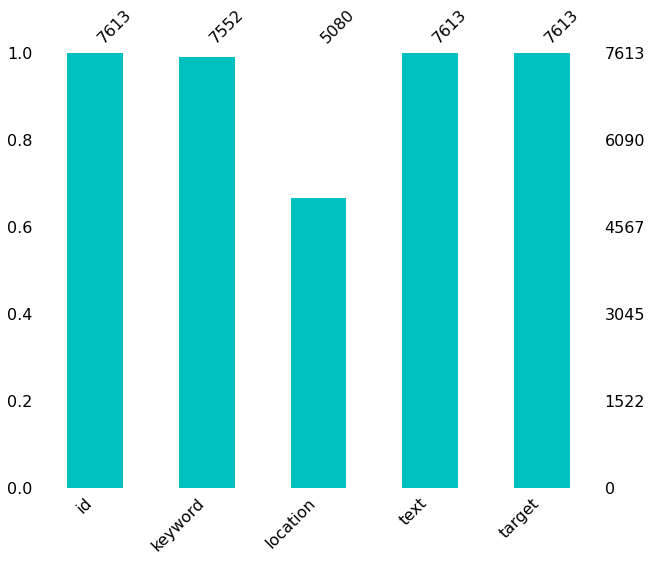

In [26]:
msno.bar(train,color='c',figsize=(10,8))

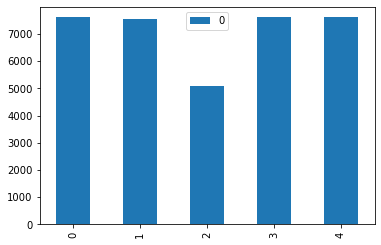

In [34]:
train.notnull().sum().reset_index().plot(kind='bar')

In [37]:
temp_=train.notnull().sum().reset_index().rename(columns={'index':'cols',
                                                         0:'Counts'})

temp_

,cols,Counts
0,id,7613
1,keyword,7552
2,location,5080
3,text,7613
4,target,7613


In [45]:
fig=go.Figure(go.Bar(x=temp_['cols'],
                     y=temp_['Counts'],
                     text=temp_['Counts'],
                     textposition='inside'
                    ))
fig.update_layout(title='Columns with count of non null values',
                 title_x=.5)
fig.show()